### **Google AI Python SDK**

The Google AI Python SDK enables developers to use Google's state-of-the-art generative AI models (like Gemini and PaLM) to build AI-powered features and applications. This SDK supports use cases like:



1.   Generate text from text-only input
2.   Generate text from text-and-images input (multimodal) (for Gemini only)
3.   Build multi-turn conversations (chat)
4.   Embedding


In [1]:
!pip install google-generativeai
!pip install PyMuPDF
!pip install tabulate

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.4/4.4 MB 13.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 30.6/30.6 MB 16.0 MB/s eta 0:00:00


## **2. Import Packages**

In [2]:
import pathlib
import textwrap

import google.generativeai as genai

from IPython.display import display
from IPython.display import Markdown


def to_markdown(text):
  text = text.replace('•', '  *')
  return Markdown(textwrap.indent(text, '> ', predicate=lambda _: True))

# New Section

In [3]:
# Used to securely store your API key
from google.colab import userdata

In [4]:
GOOGLE_API_KEY=userdata.get('GOOGLE_API_KEY')

genai.configure(api_key=GOOGLE_API_KEY)

In [5]:
for m in genai.list_models():
  if 'generateContent' in m.supported_generation_methods:
    print(m.name)

models/gemini-1.0-pro
models/gemini-1.0-pro-001
models/gemini-1.0-pro-latest
models/gemini-1.0-pro-vision-latest
models/gemini-pro
models/gemini-pro-vision


## **5.Generate text from text inputs**

Text-only prompts - use the gemini-pro model

In [6]:
model = genai.GenerativeModel('gemini-pro')


In [7]:
%%time
response = model.generate_content("What is life to you")

CPU times: user 113 ms, sys: 13.4 ms, total: 126 ms
Wall time: 8.22 s


In [8]:
to_markdown(response.text)

> Life to me is a precious journey of growth, experiences, and connections. It is a tapestry woven with moments of joy, challenges, and endless possibilities.
> 
> **A Gift:**
> Life is a gift that allows us to exist, breathe, and witness the beauty of the world. It is a privilege to have the opportunity to learn, love, and contribute to the collective tapestry.
> 
> **A Path of Growth:**
> Life is a continuous process of learning and evolving. Each experience, whether positive or negative, holds lessons and opportunities for personal development. It pushes us to expand our horizons, overcome obstacles, and reach new heights of self-discovery.
> 
> **A Tapestry of Experiences:**
> Life is a collection of countless experiences, both mundane and extraordinary. From the simplest daily routines to the most profound life events, each moment shapes our perspectives and enriches our tapestry.
> 
> **A Balancing Act:**
> Life often presents a delicate balance between joy and sorrow, triumph and adversity. It teaches us resilience, adaptability, and the importance of finding gratitude amidst the challenges.
> 
> **A Journey of Connections:**
> Life is intertwined with our relationships with others. From family and friends to colleagues and strangers, our connections form an intricate web that supports, inspires, and enriches our experiences.
> 
> **A Meaningful Purpose:**
> Life is a search for meaning and purpose. We strive to make a difference in the world, to leave our mark, and to contribute to something greater than ourselves. Finding our purpose gives our lives direction and fulfillment.
> 
> **A Sanctuary of Love:**
> Life is a place where love flourishes. It is in the bonds we form with others, the compassion we extend, and the kindness we receive that we find true meaning and happiness.
> 
> In essence, life to me is a precious gift that offers endless opportunities for growth, connection, and the pursuit of a meaningful existence. It is a tapestry of experiences, both joyous and challenging, that ultimately shapes the person we become.

## **6.Generate text from image and text inputs**

Gemini provides a multimodal model (gemini-pro-vision) that accepts both text and images and inputs.

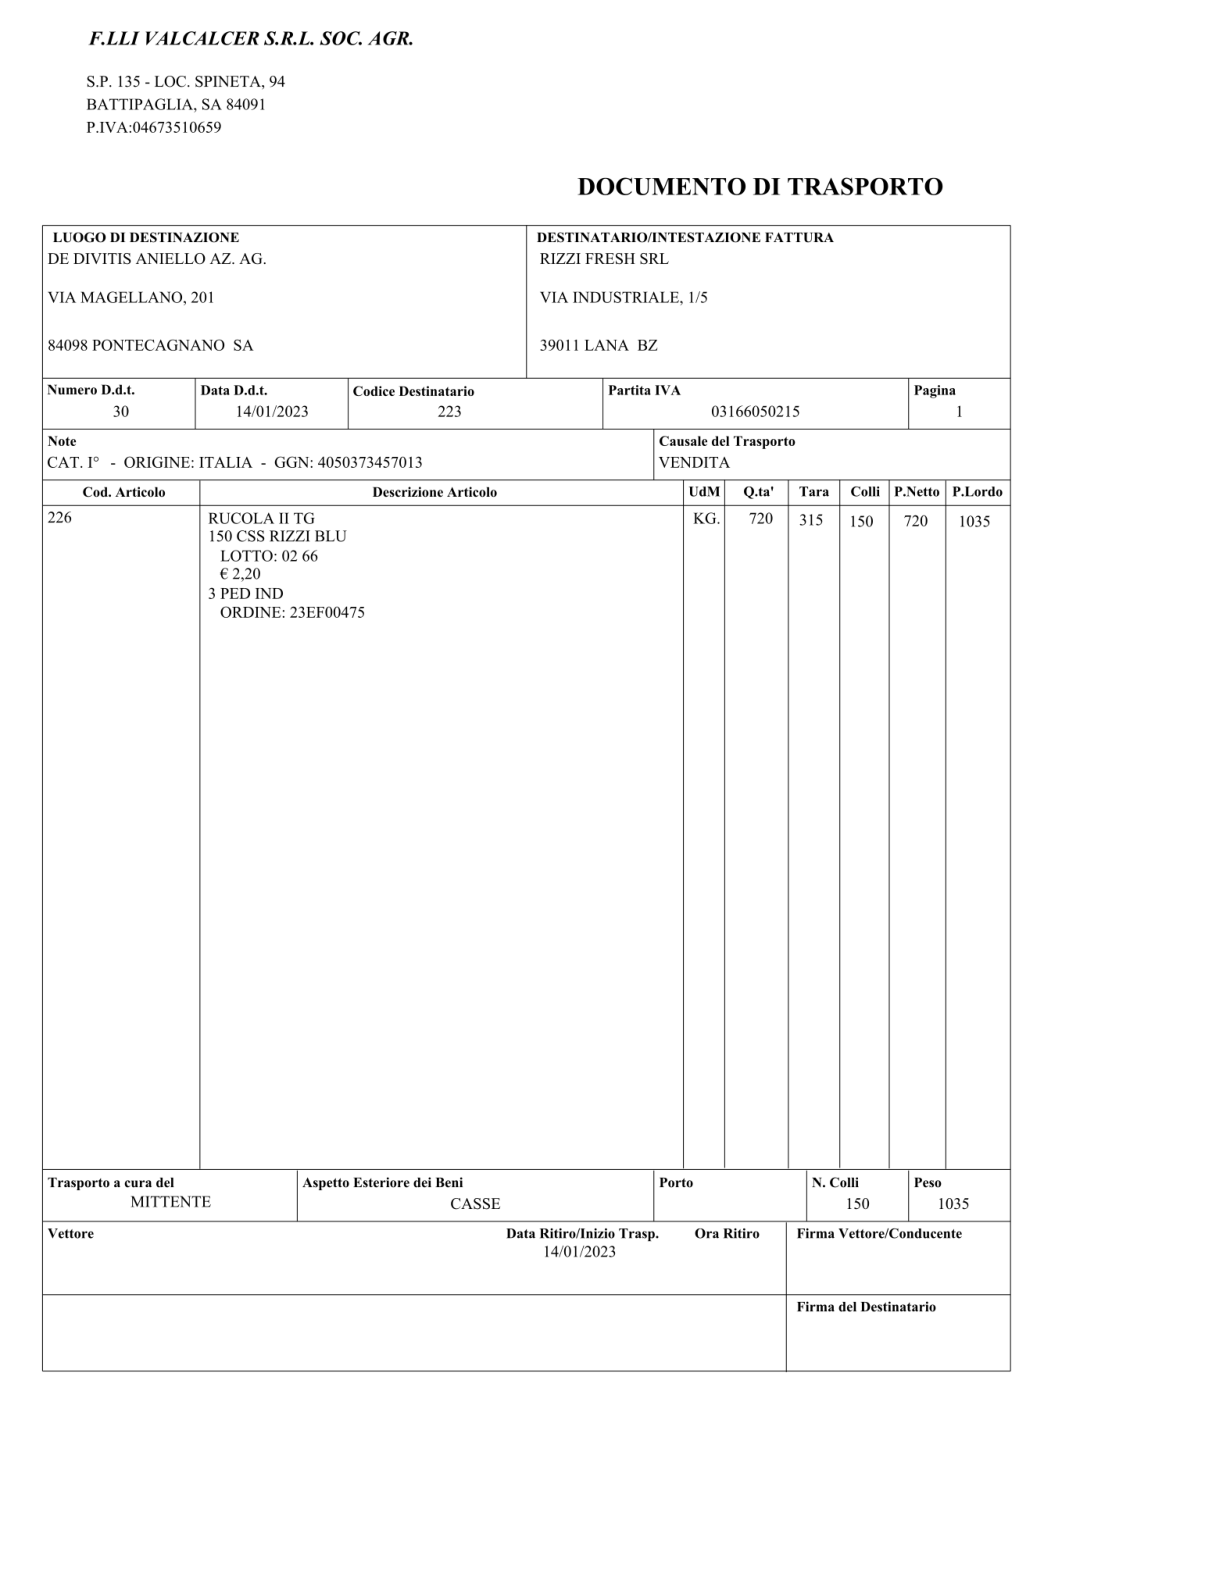

In [10]:
import os, glob, fitz
from PIL import Image
import PIL.Image

pdffile = "/content/23VF00290_Val_8.pdf"

doc = fitz.open(pdffile)
first_page = doc[0]  # Get the first page of the PDF
pix = first_page.get_pixmap(matrix=fitz.Matrix(2, 2), alpha=False)  # Render the page as a pixmap
img = Image.frombytes("RGB", [pix.width, pix.height], pix.samples)  # Convert the pixmap to a PIL image

# Display the extracted first page image
img.show()

img

In [11]:
model = genai.GenerativeModel('gemini-pro-vision')

In [12]:
'''
response = model.generate_content(img)

to_markdown(response.text)
'''

'\nresponse = model.generate_content(img)\n\nto_markdown(response.text)\n'

In [13]:
'''
to_markdown(response.text)
'''

'\nto_markdown(response.text)\n'

In [14]:

prompt="""
Please extract the following details from the Image in dataframe

Example of a dataframe1 format for the extracted details:
    Key                 Value
  key_1 :                value_1
  key_2 :                value_2

issuer_name:
issuer_addr:
issuer_cap:
issuer_city:
issuer_prov
issuer_state:
issuer_tel
issuer_id
issuer_fax
issuer_vat
issuer_contact
issuer_contact_email
issuer_contact_phone
receiver_name
receiver_addr
receiver_cap
receiver_city
receiver_prov
receiver_state
receiver_tel
receiver_fax
receiver_vat
receiver_id
receiver_contact
dest_name
dest_addr
dest_cap
dest_city
dest_prov
dest_state
dest_tel
dest_fax
dest_vat
doc_type
doc_nr
doc_date
order_nr
order_date
service_order
"""

response1 = model.generate_content([prompt, img])


In [15]:
prompt2="""
Extract the tabular information from the image and structure it into a dataframe.
Ensure that the dataframe only includes columns specified in the image; do not include additional columns.

Example of a dataframe format for the tabular part:

|  art_code  |  descrizione  |  um  |  qty  |  lotto  |  varieta  |  raccolta  |  n_colli  |  p_lordo  |  p_netto  |  prezzo  |  c_iva  |
|------------|---------------|------|-------|---------|-----------|------------|------------|------------|------------|----------|---------|
|  ...       |  ...          | ...  | ...   | ...     | ...       | ...        | ...        | ...        | ...        | ...      | ...     |
|  ...       |  ...          | ...  | ...   | ...     | ...       | ...        | ...        | ...        | ...        | ...      | ...     |

Provide all the rows ensure nothing is missed. Ensure that the table format in the dataframe matches the structure of the table in the image.
Exclude any footer information.
"""

response2 = model.generate_content([prompt2, img])

In [16]:
to_markdown(response2.text)

>  | art_code | descrizione | um | qty | lotto | varieta | raccolta | n_colli | p_lordo | p_netto | prezzo | c_iva |
> | :---: | :---: | :---: | :---: | :---: | :---: | :---: | :---: | :---: | :---: | :---: | :---: |
> | 226 | RUCOLA II TG | KG | 720 | 150 | 335 | 14/01/2023 | 1 | 1035 | 720 | | |
> | | 50 SS RIZZI BLU |  | | | | | | | | | |
> | | LOTTO: 02 66 |  | | | | | | | | | |
> | | € 2,20 |  | | | | | | | | | |
> | | 3 PED IND |  | | | | | | | | | |
> | | ORDINE: 23EF00475 |  | | | | | | | | | |

In [17]:
to_markdown(response1.text)

>  | Key                 | Value                                                                                                              |
> |----------------------|--------------------------------------------------------------------------------------------------------------------------|
> | issuer_name          | F.LLI VALCALCER S.R.L. SOC. AGR.                                                                                           |
> | issuer_addr          | S.P. 135 - LOC. SPINETA, 94                                                                                               |
> | issuer_cap           | 84091                                                                                                                  |
> | issuer_city          | BATTIPAGLIA                                                                                                               |
> | issuer_prov          | SA                                                                                                                  |
> | issuer_state         | IT                                                                                                                  |
> | issuer_tel           | 0828 351089                                                                                                         |
> | issuer_id            | IT04673510659                                                                                                       |
> | issuer_fax           | 0828 351089                                                                                                         |
> | issuer_vat           | IT04673510659                                                                                                       |
> | issuer_contact       |                                                                                                                     |
> | issuer_contact_email |                                                                                                                     |
> | issuer_contact_phone |                                                                                                                     |
> | receiver_name        | RIZZI FRESH SRL                                                                                                          |
> | receiver_addr        | VIA MAGAZZINO                                                                                                           |
> | receiver_cap         | 39011                                                                                                                  |
> | receiver_city        | LANA BZ                                                                                                             |
> | receiver_prov        | BZ                                                                                                                  |
> | receiver_state       | IT                                                                                                                  |
> | receiver_tel         | 0471 520215                                                                                                         |
> | receiver_fax         | 0471 520215                                                                                                         |
> | receiver_vat         | IT01660050215                                                                                                       |
> | receiver_id          |                                                                                                                     |
> | receiver_contact     |                                                                                                                     |
> | dest_name            |                                                                                                                     |
> | dest_addr            |                                                                                                                     |
> | dest_cap             |                                                                                                                     |
> | dest_city            |                                                                                                                     |
> | dest_prov            |                                                                                                                     |
> | dest_state           |                                                                                                                     |
> | dest_tel             |                                                                                                                     |
> | dest_fax             |                                                                                                                     |
> | dest_vat             |                                                                                                                     |
> | doc_type             | DDT                                                                                                                   |
> | doc_nr               | 226                                                                                                                  |
> | doc_date             | 14/01/2023                                                                                                         |
> | order_nr             |                                                                                                                     |
> | order_date           |                                                                                                                     |
> | service_order        |                                                                                                                     |

In [18]:
import pandas as pd
from io import StringIO
from tabulate import tabulate

# Parse the markdown text into a DataFrame
df = pd.read_csv(StringIO(response1.text), sep="\t")

# Print the tabulated form
print(tabulate(df, headers='keys', tablefmt='psql'))

+----+-------------------------------------------------------------------------------------------------------------------------------------------------------+
|    |  | Key                 | Value                                                                                                              |         |
|----+-------------------------------------------------------------------------------------------------------------------------------------------------------|
|  0 | |----------------------|--------------------------------------------------------------------------------------------------------------------------|   |
|  1 | | issuer_name          | F.LLI VALCALCER S.R.L. SOC. AGR.                                                                                           | |
|  2 | | issuer_addr          | S.P. 135 - LOC. SPINETA, 94                                                                                               |  |
|  3 | | issuer_cap           | 84091         